Задание

Вместо Beautiful Soup использовать библиотеку LXML.

найти h2 теги с атрибутом align равным center
найти h2 теги у которых есть аттрибут align
извлечь текстовое содержимое тега с разметкой внутри
извлечь два первых параграфа с текстом из страницы на Википедии
извлечь список районов Дубны
извлечь таблицу климата
сохранить изображения

In [1]:
from lxml import etree
import requests 
from lxml import html

In [2]:
url = "https://ru.wikipedia.org/wiki/Кимры"

tree = html.fromstring(requests.get(url).content)

Шаг 1: Найти теги h2 с атрибутом выравнивания, равным центру

In [3]:
# Find h2 tags with alignment attribute equal to center
h2_align_center_tags = tree.xpath("//h2[@align='center']")
for tag in h2_align_center_tags:
    print(tag.text)

Шаг 2: Найти теги h2, которые имеют атрибут выравнивания

In [4]:
# Find h2 tags which have alignment attribute
h2_align_tags = tree.xpath('//h2[@align]')
for tag in h2_align_tags:
    print(tag.text)

In [5]:
h2_tags = tree.xpath('//h2')
for tag in h2_tags:
  print(tag.text)

Содержание
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
Навигация


Извлекаем текстовое содержимое тега с разметкой внутри

In [6]:
for tag in h2_align_center_tags:
    print(tag.text)

In [7]:
for tag in h2_align_tags:
    print(tag.text)

Извлекаем два первых параграфа с текстом из страницы на Википедии

In [33]:
paragraphs = tree.xpath('//div[@id="mw-content-text"]/div[@class="mw-parser-output"]/p')

print(paragraphs[0].text_content(), paragraphs[1].text_content())

Ки́мры — город в Тверской области России. Административный центр Кимрского муниципального округа. С 1929 до 2022 года был центром Кимрского района, в который не входил, так как был городом областного значения. С 2005 до 2022 года образовывал городской округ город Кимры. Расположен на Волге, при впадении в неё речки Кимрки. Население — 40 875[1] человек (2021). Площадь — 44 км²[2].
 Первые упоминания о селе Кимра датированы серединой XVI века. Ещё во времена правления Петра I оно получило известность центра сапожного промысла в Российской империи[3][4]. К концу XIX века село окончательно сложилось как экономический центр обувной промышленности[5][6].
3 [16] июня 1917 года село Кимры получило статус города[7].



<зачеркнуто> Извлекаем список районов Дубны </зачеркнуто>

Извлекаем мэра Кимр

In [10]:
table = tree.xpath("//tr/td/span/text()")[0]
print("Мэр:", table)

Header: Кимры
Content: Андрей Николаевич Лукьянов


Извлекаем таблицу климата

In [12]:
table_title = "Климат Кимр"
table = tree.xpath('//table[.//caption[contains(., "%s")]]' % table_title)[0]

# Вытягиваем строки
header = table.xpath('.//tr[1]/*')
hrows = table.xpath('.//tr[position() > 1]//th')
rows = table.xpath('.//tr[position() > 1]//td')
hr = []
h = []
r = []
for i in range(len(hrows)):
  hr.append(hrows[i].text_content().replace("\n",""))
print(hr)
for i in range(len(header)):
  h.append(header[i].text_content().replace("\n",""))
print(h)
for i in range(len(rows)-1):
  r.append(rows[i].text_content().replace("\n",""))
print(r)

['Средний максимум, °C', 'Средняя температура, °C', 'Средний минимум, °C', 'Норма осадков, мм']
['Показатель', 'Янв.', 'Фев.', 'Март', 'Апр.', 'Май', 'Июнь', 'Июль', 'Авг.', 'Сен.', 'Окт.', 'Нояб.', 'Дек.', 'Год']
['−6,2', '−5,1', '1', '10,1', '17,7', '21,3', '23,5', '21,2', '15', '7,8', '0,2', '−4,1', '8,5', '−9,1', '−8,7', '−3', '5,2', '12', '16,1', '18,2', '16', '10,5', '4,5', '−2,1', '−6,6', '4,4', '−12,3', '−12,3', '−6,9', '0,7', '6,6', '10,8', '13,3', '11,2', '6,5', '1,5', '−4,4', '−9,2', '0,5', '40', '33', '31', '36', '57', '71', '77', '68', '57', '58', '48', '44', '620']


In [13]:
import pandas as pd

In [14]:
#Делаем единые строки
slice_size = int(len(r)/(len(hr)))

values = []
for i in range(len(hr)):
  values.append([hr[i]])
  values[i].extend(r[i*slice_size:(i+1)*slice_size])

#Создаем таблицу
climate = pd.DataFrame(values, columns=h)
climate

,Показатель,Янв.,Фев.,Март,Апр.,Май,Июнь,Июль,Авг.,Сен.,Окт.,Нояб.,Дек.,Год
0,"Средний максимум, °C","−6,2","−5,1",1,"10,1","17,7","21,3","23,5","21,2",15,"7,8","0,2","−4,1","8,5"
1,"Средняя температура, °C","−9,1","−8,7",−3,"5,2",12,"16,1","18,2",16,"10,5","4,5","−2,1","−6,6","4,4"
2,"Средний минимум, °C","−12,3","−12,3","−6,9","0,7","6,6","10,8","13,3","11,2","6,5","1,5","−4,4","−9,2","0,5"
3,"Норма осадков, мм",40,33,31,36,57,71,77,68,57,58,48,44,620


Cохраняем изображения

In [15]:
#Находим изображения
images = tree.xpath('//div[@class="thumbinner"]//img')
len(images)

17

In [16]:
#Получаем ссылки
links = []
for i in range(len(images)):
  links.append("https:" + images[i].get('src'))
print(links)

['https://upload.wikimedia.org/wikipedia/commons/thumb/7/71/The_River_Kimrka_%28Kimry%29.jpg/300px-The_River_Kimrka_%28Kimry%29.jpg', 'https://upload.wikimedia.org/wikipedia/commons/thumb/d/d5/Kimry_village_in_1772.jpg/300px-Kimry_village_in_1772.jpg', 'https://upload.wikimedia.org/wikipedia/commons/thumb/d/d6/Anna_Vorontsova_by_Antropov_%281763%2C_Russian_museum%29.jpg/190px-Anna_Vorontsova_by_Antropov_%281763%2C_Russian_museum%29.jpg', 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/85/Countess_Samoilova_with_Giovanina_Pacini_by_K.Brullov_%281832-4%2C_Hillwood%29.jpg/180px-Countess_Samoilova_with_Giovanina_Pacini_by_K.Brullov_%281832-4%2C_Hillwood%29.jpg', 'https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/Cathedral_Square_in_Kimry_village.jpg/300px-Cathedral_Square_in_Kimry_village.jpg', 'https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/Zaytsev_House_Kimry.JPG/220px-Zaytsev_House_Kimry.JPG', 'https://upload.wikimedia.org/wikipedia/ru/thumb/e/ef/%D0%A0%D0%B0%

In [17]:
#Получаем названия
fnames = [link.split('/')[-1] for link in links]
fnames

['300px-The_River_Kimrka_%28Kimry%29.jpg',
 '300px-Kimry_village_in_1772.jpg',
 '190px-Anna_Vorontsova_by_Antropov_%281763%2C_Russian_museum%29.jpg',
 '180px-Countess_Samoilova_with_Giovanina_Pacini_by_K.Brullov_%281832-4%2C_Hillwood%29.jpg',
 '300px-Cathedral_Square_in_Kimry_village.jpg',
 '220px-Zaytsev_House_Kimry.JPG',
 '220px-%D0%A0%D0%B0%D0%B7%D1%80%D1%83%D1%88%D0%B5%D0%BD%D0%BD%D1%8B%D0%B9%D0%9F%D0%BE%D0%BA%D1%80%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B9%D0%A1%D0%BE%D0%B1%D0%BE%D1%80.jpg',
 '160px-Memorial_tablet_on_school_%E2%84%96_14_in_Kimry.jpg',
 '240px-2008_Stamp_of_Russia._Kimry._Bridge_over_Volga_river.jpg',
 '275px-Scheme-Borki-1-2008.jpg',
 '220px-Sav2.jpg',
 '220px-%D0%92%D0%BE%D0%BA%D0%B7%D0%B0%D0%BB_%D0%BD%D0%B0_%D1%81%D1%82%D0%B0%D0%BD%D1%86%D0%B8%D0%B8_%C2%AB%D0%A1%D0%B0%D0%B2%D1%91%D0%BB%D0%BE%D0%B2%D0%BE%C2%BB.jpg',
 '220px-%D0%A5%D1%80%D0%B0%D0%BC_%D0%B2_%D0%A1%D0%B0%D0%B2%D1%91%D0%BB%D0%BE%D0%B2%D0%B5.jpg',
 '223px-%D0%A5%D1%80%D0%B0%D0%BC_%D0%98%D0%BE%D0%B0%D0%BD%D

In [18]:
cd /content

/content


In [19]:
mkdir -p /content/kimry_images

In [20]:
cd kimry_images

/content/kimry_images


In [21]:
ls

In [22]:
def dwnld_image(url, save_to):
    response = requests.get(url, 
                            allow_redirects=True,
                            headers = 
                            {'User-Agent': f'StudentCode/0.1 requests/{requests.__version__}'}
    )
    print(url, response)
    if response.status_code != 200:
        raise Exception(response.text)
        
    with open(save_to, 'wb') as f:        
        f.write(response.content)

In [23]:
#Скачиваем картинки
from time import sleep
for l, fn in zip(links, fnames):
    dwnld_image(l, '/content/kimry_images/' + fn)
    sleep(3)

https://upload.wikimedia.org/wikipedia/commons/thumb/7/71/The_River_Kimrka_%28Kimry%29.jpg/300px-The_River_Kimrka_%28Kimry%29.jpg <Response [200]>
https://upload.wikimedia.org/wikipedia/commons/thumb/d/d5/Kimry_village_in_1772.jpg/300px-Kimry_village_in_1772.jpg <Response [200]>
https://upload.wikimedia.org/wikipedia/commons/thumb/d/d6/Anna_Vorontsova_by_Antropov_%281763%2C_Russian_museum%29.jpg/190px-Anna_Vorontsova_by_Antropov_%281763%2C_Russian_museum%29.jpg <Response [200]>
https://upload.wikimedia.org/wikipedia/commons/thumb/8/85/Countess_Samoilova_with_Giovanina_Pacini_by_K.Brullov_%281832-4%2C_Hillwood%29.jpg/180px-Countess_Samoilova_with_Giovanina_Pacini_by_K.Brullov_%281832-4%2C_Hillwood%29.jpg <Response [200]>
https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/Cathedral_Square_in_Kimry_village.jpg/300px-Cathedral_Square_in_Kimry_village.jpg <Response [200]>
https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/Zaytsev_House_Kimry.JPG/220px-Zaytsev_House_Kimry.JPG <

/content/kimry_images/300px-The_River_Kimrka_%28Kimry%29.jpg


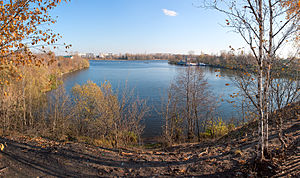

/content/kimry_images/220px-%D0%A5%D1%80%D0%B0%D0%BC_%D0%B2_%D0%A1%D0%B0%D0%B2%D1%91%D0%BB%D0%BE%D0%B2%D0%B5.jpg


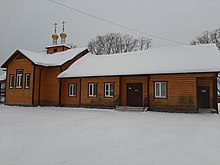

/content/kimry_images/300px-Cathedral_Square_in_Kimry_village.jpg


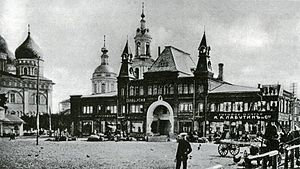

/content/kimry_images/223px-%D0%A5%D1%80%D0%B0%D0%BC_%D0%98%D0%BE%D0%B0%D0%BD%D0%BD%D0%B0_%D0%9F%D1%80%D0%B5%D0%B4%D1%82%D0%B5%D1%87%D0%B8_%D0%B2_%D0%A1%D0%B0%D0%B2%D1%91%D0%BB%D0%BE%D0%B2%D0%B5.jpg


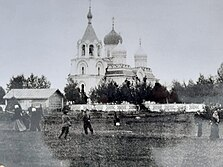

/content/kimry_images/220px-%D0%A0%D0%B0%D0%B7%D1%80%D1%83%D1%88%D0%B5%D0%BD%D0%BD%D1%8B%D0%B9%D0%9F%D0%BE%D0%BA%D1%80%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B9%D0%A1%D0%BE%D0%B1%D0%BE%D1%80.jpg


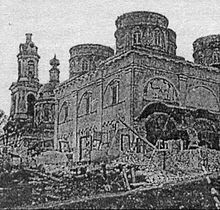

/content/kimry_images/275px-Scheme-Borki-1-2008.jpg


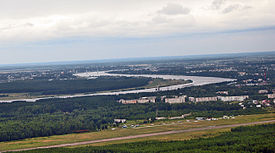

/content/kimry_images/220px-%D0%92%D0%BE%D0%BA%D0%B7%D0%B0%D0%BB_%D0%BD%D0%B0_%D1%81%D1%82%D0%B0%D0%BD%D1%86%D0%B8%D0%B8_%C2%AB%D0%A1%D0%B0%D0%B2%D1%91%D0%BB%D0%BE%D0%B2%D0%BE%C2%BB.jpg


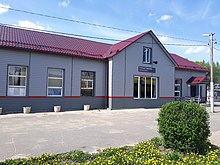

/content/kimry_images/180px-Countess_Samoilova_with_Giovanina_Pacini_by_K.Brullov_%281832-4%2C_Hillwood%29.jpg


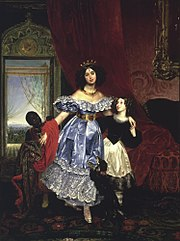

/content/kimry_images/266px-Kimry_teatre.jpg


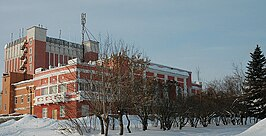

/content/kimry_images/310px-Monument_in_memory_of_shoemaker_in_Kimry_9.09.2014.jpg


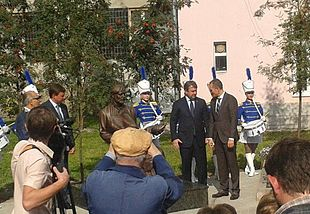

/content/kimry_images/240px-2008_Stamp_of_Russia._Kimry._Bridge_over_Volga_river.jpg


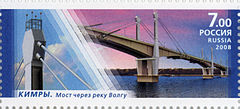

/content/kimry_images/300px-Kimry_village_in_1772.jpg


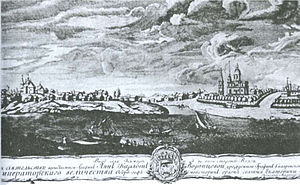

/content/kimry_images/160px-Memorial_tablet_on_school_%E2%84%96_14_in_Kimry.jpg


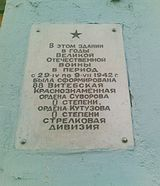

/content/kimry_images/220px-Sav2.jpg


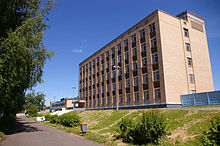

/content/kimry_images/220px-Zaytsev_House_Kimry.JPG


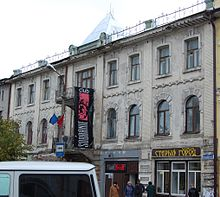

/content/kimry_images/220px-%D0%A2%D1%83-124_%D0%B2_%D0%9A%D0%B8%D0%BC%D1%80%D0%B0%D1%85.jpg


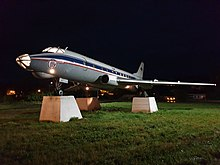

/content/kimry_images/190px-Anna_Vorontsova_by_Antropov_%281763%2C_Russian_museum%29.jpg


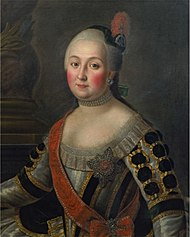

In [24]:
#Просматриваем картинки
from IPython.display import Image
from pathlib import Path
for fname in Path('/content/kimry_images').glob('*'):
    print(fname)
    display(Image(filename=fname))

In [25]:
from skimage.io import imread_collection

col = imread_collection('/content/kimry_images/*')

In [26]:
import matplotlib.pyplot as plt

for img in col:
    plt.figure()
    plt.imshow(img)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.